## Importing required modules

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import selenium
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import re
import time
from selenium.webdriver.support.ui import Select
from selenium.webdriver import ActionChains

## using webdriver to imitate chrome browser

In [3]:
driver = webdriver.Chrome()
driver.get("https://www.laithwaites.co.uk/wines/Red-Wine/_/N-1z141we")

In [4]:
cookie_button = driver.find_element(By.XPATH,'//button[@id="onetrust-accept-btn-handler"]')
cookie_button.click()

## Using Select class of selenium to select 50 results per page from drop down menu

In [6]:
noinput = Select(driver.find_element(By.XPATH,'//select[@id="numPerPage"]'))
noinput.select_by_index(2)

## writing for loop to scrape URLs from all pages for red wine

In [7]:
stop = False
wine_urls = []
try:
    while not stop:
        wines = driver.find_elements(By.XPATH,'//a[@class="h3"]')
       # print("Found " + str(len(postings)) + " postings")
        for wine in wines:
            wine_urls.append(wine.get_attribute('href'))
        for url in wine_urls:
            if("Mix" in url):
                wine_urls.remove(url)
        next_arrows = driver.find_elements(By.XPATH,'//a[@id="nextPage"]')
        if len(next_arrows) > 0:
            next_arrow = next_arrows[0] 
            if 'disabled' in next_arrow.get_attribute('class'):
                stop = True
                #next_arrow.click()
                #time.sleep(3) # We need to wait a little, as the page takes time to load (try setting the wait to 0 and see what happens!)
            else:
                #ActionsChains ob = new Actions(driver);
                action=ActionChains(driver)
                action.click(next_arrow)
                #Action action  = ob.build();
                action.perform();
                #next_arrow.click()
                time.sleep(5)
        else:
            stop = True
except Exception:
    print("END")

END


In [8]:
import numpy as np

## Loop to extract required information from every URL using Beautiful Soap

In [11]:
_names = []
_countries = []
_ABV = []
_ratings = []
_price = []
# We iterate through the URLs, this may take a bit
for link in wine_urls:
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    info = soup.findAll("div", class_="detail-text")
    if len(info) == 9:
        name = soup.find("h1", class_="prod-name")
        if(name is not None):
            name = name.text
            name = re.sub('\s+', ' ', name)
        else:
            name = np.nan
        _names.append(name)
        cntry = soup.find("span", class_="pull-left icons country-icon")
        cntry = cntry.find("img")
        cntry = cntry['title']   
        _countries.append(cntry)
        ABV = info[5].text
        if len(ABV) == 0:
            ABV = np.nan
        else:
            ABV = re.findall('[1-9]+\.?[0-9]*', ABV)
            if len(ABV) == 0:
                ABV =np.nan
            else:
                ABV=ABV[0]
        _ABV.append(ABV)
        rating_tag=soup.findAll("span",class_="rating-score")
        if len(rating_tag):
            rating = rating_tag[0].text
            if len(rating) != 0:
                rating = re.findall('[0-9]*\.?[0-9]*', rating)[0]
            else:
                rating = np.nan
        else:
            rating = np.nan
        _ratings.append(rating)
        price_tag = soup.findAll("span", class_="price-per-bottle")
        if len(price_tag):
            price = price_tag[0].text[1:]
        else:
            price = np.nan
        _price.append(price)
    else:
        continue
redwine_data = pd.DataFrame(
    {'Names': _names,
     'Country': _countries,
     'ABV' : _ABV,
     'Ratings' : _ratings,
     'Price' : _price
     })
redwine_data


,Names,Country,ABV,Ratings,Price
0,Cabalié 2021,France,13.0,4.5,11.99
1,Cabalié (1 Litre Wine Box) 2021,France,13.0,4.8,9.99
2,Pillastro Primitivo 2020,Italy,10,4.4,11.99
3,Cabalié Cuvée Vieilles Vignes 2021,France,13.0,4.5,14.99
4,Rex Mundi Shiraz Grenache 2021,France,13.0,4.4,11.99
...,...,...,...,...,...
64,Château Prieuré-les-Tours 2015,France,13.0,3.6,18.99
65,Massivo Nero d'Avola 2021,Italy,13.5,4.0,12.99
66,HJ Fabre Barrel Selection Patagonia Malbec 2021,Argentina,10,4.2,17.99
67,Château Pontet-Canet Organic 2021,France,NaN,,NaN


In [12]:
redwine_data.to_csv("redwine.csv")

## Repeating the process for white wine

In [13]:
driver = webdriver.Chrome()
driver.get("https://www.laithwaites.co.uk/wines/White-Wine/_/N-1z141yb")

In [14]:
cookie_button = driver.find_element(By.XPATH,'//button[@id="onetrust-accept-btn-handler"]')
cookie_button.click()

In [15]:
noinput = Select(driver.find_element(By.XPATH,'//select[@id="numPerPage"]'))
noinput.select_by_index(2)

In [16]:
stop = False
whitewine_urls = []
try:
    while not stop:
        wines = driver.find_elements(By.XPATH,'//a[@class="h3"]')
        for wine in wines:
            whitewine_urls.append(wine.get_attribute('href'))
        for url in whitewine_urls:
            if("Mix" in url):
                whitewine_urls.remove(url)
        next_arrows = driver.find_elements(By.XPATH,'//a[@id="nextPage"]')
        if len(next_arrows) > 0:
            next_arrow = next_arrows[0] 
            if 'disabled' in next_arrow.get_attribute('class'):
                stop = True
            else:
                #ActionsChains ob = new Actions(driver);
                action=ActionChains(driver)
                action.click(next_arrow)
                #Action action  = ob.build();
                action.perform();
                #next_arrow.click()
                time.sleep(5)
        else:
            stop = True
except Exception:
    print("END")

END


In [17]:
_names = []
_countries = []
_ABV = []
_ratings = []
_price = []
# We iterate through the URLs, this may take a bit
for link in whitewine_urls:
    page = requests.get(link)
    soup = BeautifulSoup(page.content, "html.parser")
    info = soup.findAll("div", class_="detail-text")
    if len(info) == 9:
        name = soup.find("h1", class_="prod-name")
        if(name is not None):
            name = name.text
            name = re.sub('\s+', ' ', name)
        else:
            name = np.nan
        _names.append(name)
        cntry = soup.find("span", class_="pull-left icons country-icon")
        cntry = cntry.find("img")
        cntry = cntry['title']   
        _countries.append(cntry)
        ABV = info[5].text
        if len(ABV) == 0:
            ABV = np.nan
        else:
            ABV = re.findall('[1-9]+\.?[0-9]*', ABV)
            if len(ABV) == 0:
                ABV =np.nan
            else:
                ABV=ABV[0]
        _ABV.append(ABV)
        rating_tag=soup.findAll("span",class_="rating-score")
        if len(rating_tag):
            rating = rating_tag[0].text
            if len(rating) != 0:
                rating = re.findall('[0-9]*\.?[0-9]*', rating)[0]
            else:
                rating = np.nan
        else:
            rating = np.nan
        _ratings.append(rating)
        price_tag = soup.findAll("span", class_="price-per-bottle")
        if len(price_tag):
            price = price_tag[0].text[1:]
        else:
            price = np.nan
        _price.append(price)
    else:
        continue
whitewine_data = pd.DataFrame(
    {'Names': _names,
     'Country': _countries,
     'ABV' : _ABV,
     'Ratings' : _ratings,
     'Price' : _price
     })
whitewine_data

,Names,Country,ABV,Ratings,Price
0,The Hour-Teller Sauvignon Blanc 2021,New Zealand,13.0,4.2,14.99
1,The Escapist Sauvignon Blanc 2021,South Africa,12.5,3.9,8.99
2,Albert Bichot Mâcon-Lugny Les Charmes 2020,France,13.0,3.8,17.99
3,Clos des Lunes Lune d’Argent Bordeaux Blanc 2...,France,13.5,,19.99
4,L'Epiphanie de Bordeaux Blanc 2021,France,9.38,2.0,25.00
5,Méritoire Sauvignon Blanc 2020,France,11.5,3.3,10.99
6,Cloudy Bay Sauvignon Blanc 2022,New Zealand,13.5,,25.00
7,Sentiero dei Pini Pinot Grigio 2021,Italy,12.0,3.9,10.99
8,Viña Tarapacá Riverscape Collection Sauvignon...,Chile,12.5,3.7,10.99
9,Il Pino Pinot Grigio 2021,Italy,12.0,4.0,11.99


In [18]:
whitewine_data.to_csv("whitewine.csv")

## Analysis for red wine

### Data Pre-processing

In [19]:
df1 = redwine_data
df2 = whitewine_data

In [20]:
df1.dtypes

Names      object
Country    object
ABV        object
Ratings    object
Price      object
dtype: object

In [22]:
df1['Ratings'] = pd.to_numeric(df1['Ratings'])
df1['Price'] = pd.to_numeric(df1['Price'])
df1['ABV'] = pd.to_numeric(df1['ABV'])

In [24]:
df1.dtypes

Names       object
Country     object
ABV        float64
Ratings    float64
Price      float64
dtype: object

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Names    69 non-null     object 
 1   Country  69 non-null     object 
 2   ABV      68 non-null     float64
 3   Ratings  63 non-null     float64
 4   Price    68 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.8+ KB


In [29]:
updated_df = df1
updated_df['Ratings']=updated_df['Ratings'].fillna(updated_df['Ratings'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Names    69 non-null     object 
 1   Country  69 non-null     object 
 2   ABV      68 non-null     float64
 3   Ratings  69 non-null     float64
 4   Price    68 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.8+ KB


In [30]:
updated_df = updated_df.dropna(axis=0)

In [31]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 68
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Names    68 non-null     object 
 1   Country  68 non-null     object 
 2   ABV      68 non-null     float64
 3   Ratings  68 non-null     float64
 4   Price    68 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.2+ KB


### Visualizations

In [32]:
import seaborn as sns

In [33]:
dfr = updated_df

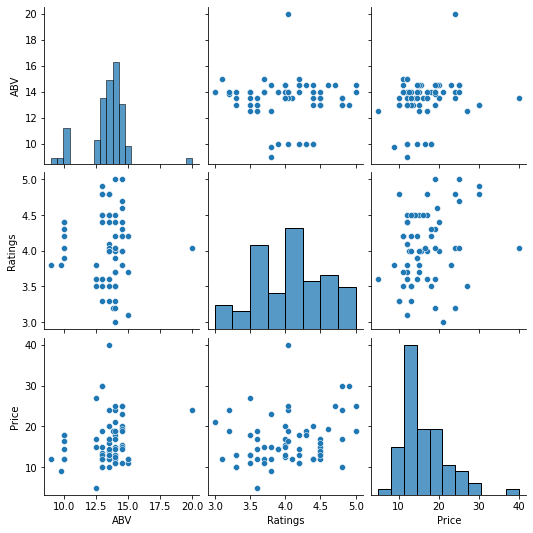

In [34]:
sns.pairplot(dfr)

In [35]:
dfr.corr()

,ABV,Ratings,Price
ABV,1.000000,-0.028825,0.196908
Ratings,-0.028825,1.000000,0.223197
Price,0.196908,0.223197,1.000000


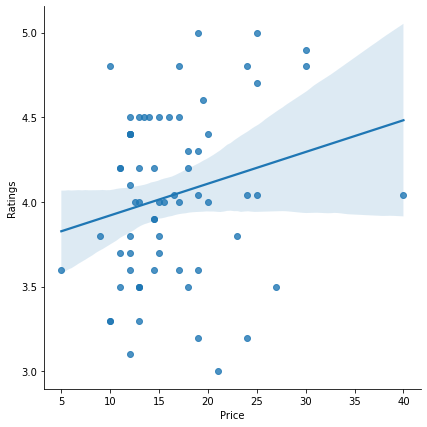

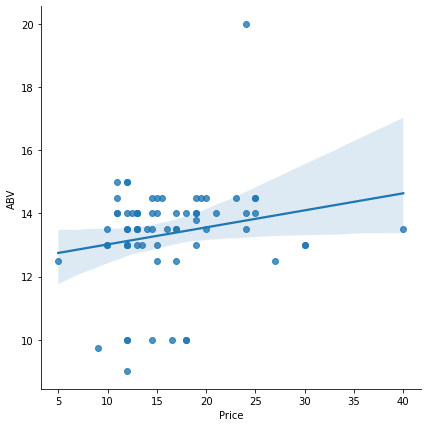

In [42]:
sns.pairplot(dfr, y_vars=['Ratings'],x_vars=['Price'], kind = 'reg',height=6)
sns.pairplot(dfr, y_vars=['ABV'],x_vars=['Price'], kind = 'reg',height=6)

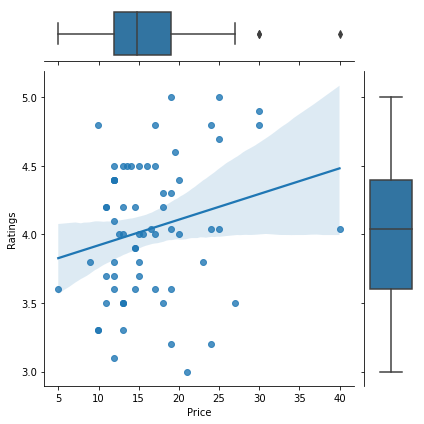

In [58]:
g = sns.JointGrid(data=dfr, x="Price", y="Ratings")
g.plot(sns.regplot,sns.boxplot)

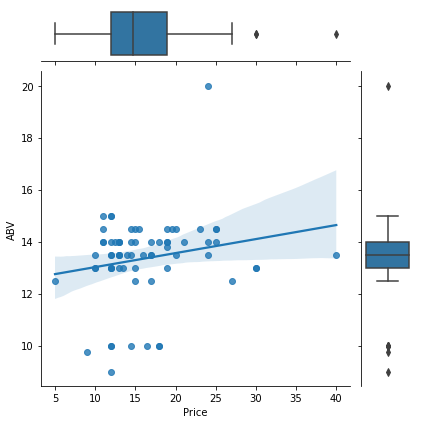

In [53]:
g = sns.JointGrid(data=dfr, x="Price", y="ABV")
g.plot(sns.regplot,sns.boxplot)

In [140]:
newdf = dfr.groupby(['Country'])["Ratings"].mean().reset_index(name='Average Ratings')
newdf=newdf.sort_values(by=['Average Ratings'])
newdf

,Country,Average Ratings
2,Bulgaria,3.300000
7,South Africa,3.513228
1,Australia,3.733333
8,Spain,3.750000
3,Chile,3.800000
5,Italy,3.956614
0,Argentina,4.083333
4,France,4.189657
9,USA,4.400000
6,Portugal,4.433333


In [141]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Country', ylabel='Average Ratings'>

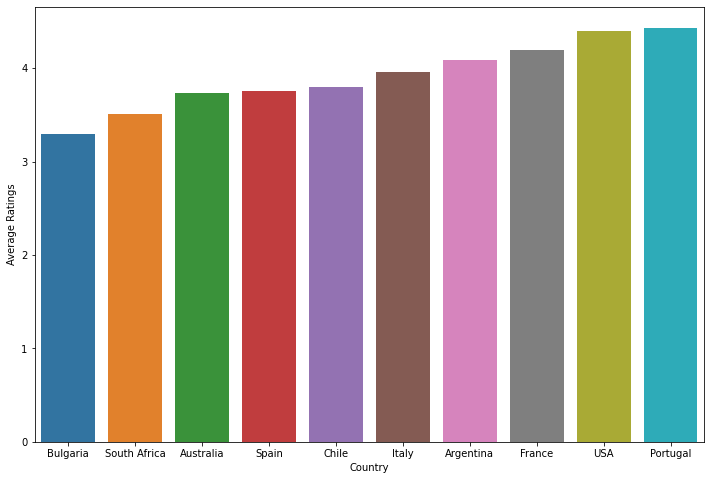

In [142]:
plt.figure(figsize=(12,8))
sns.barplot(data = newdf, x='Country', y='Average Ratings')

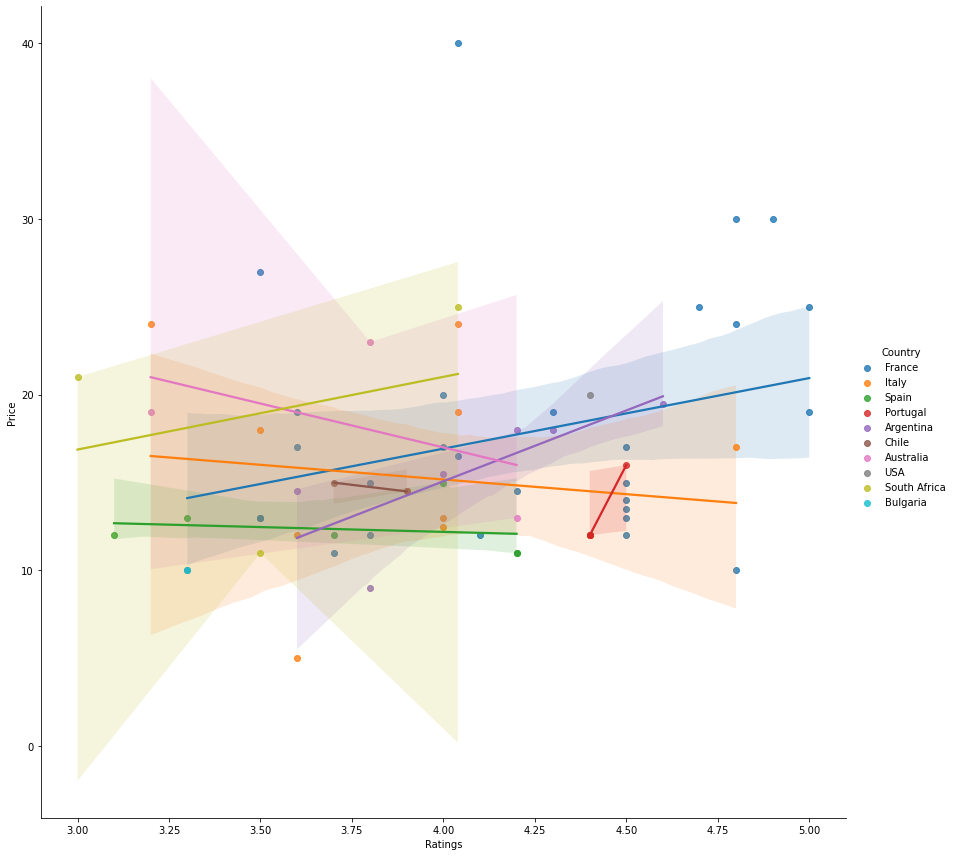

In [68]:
sns.lmplot(data=dfr, y="Price", x="Ratings",hue="Country",height=12)

## Analysis for white wine

### Data Pre-processing

In [63]:
df2.dtypes

Names      object
Country    object
ABV        object
Ratings    object
Price      object
dtype: object

In [64]:
df2['Ratings'] = pd.to_numeric(df2['Ratings'])
df2['Price'] = pd.to_numeric(df2['Price'])
df2['ABV'] = pd.to_numeric(df2['ABV'])

In [65]:
df2.dtypes

Names       object
Country     object
ABV        float64
Ratings    float64
Price      float64
dtype: object

In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Names    37 non-null     object 
 1   Country  37 non-null     object 
 2   ABV      37 non-null     float64
 3   Ratings  32 non-null     float64
 4   Price    36 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.6+ KB


In [69]:
updated_df = df2
updated_df['Ratings']=updated_df['Ratings'].fillna(updated_df['Ratings'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Names    37 non-null     object 
 1   Country  37 non-null     object 
 2   ABV      37 non-null     float64
 3   Ratings  37 non-null     float64
 4   Price    36 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.6+ KB


In [70]:
updated_df = updated_df.dropna(axis=0)

In [71]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 36
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Names    36 non-null     object 
 1   Country  36 non-null     object 
 2   ABV      36 non-null     float64
 3   Ratings  36 non-null     float64
 4   Price    36 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.7+ KB


In [72]:
dfw = updated_df

### Visualizations

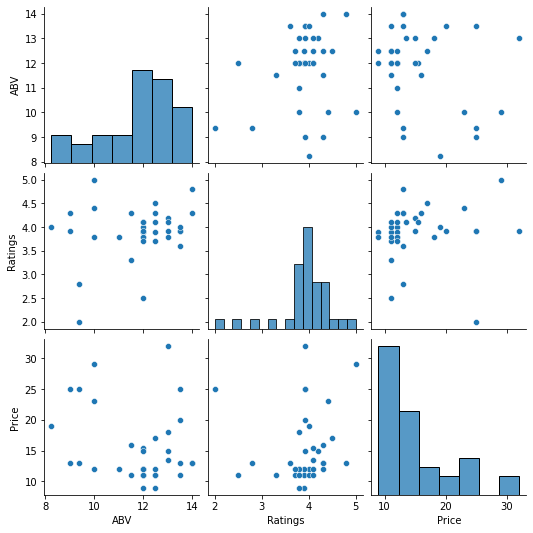

In [73]:
sns.pairplot(dfw)

In [75]:
dfw.corr()

,ABV,Ratings,Price
ABV,1.000000,0.226138,-0.244024
Ratings,0.226138,1.000000,0.085475
Price,-0.244024,0.085475,1.000000


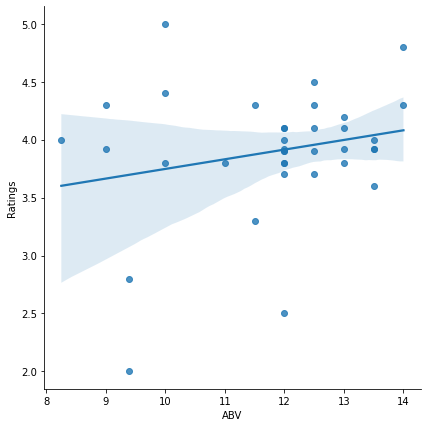

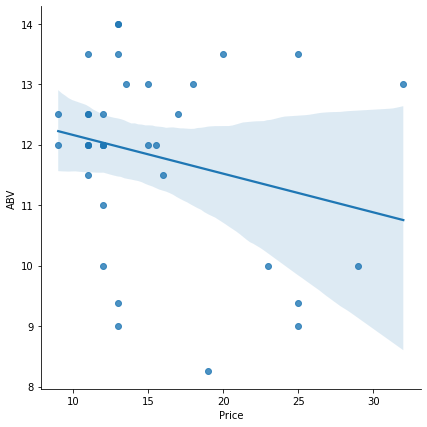

In [77]:
sns.pairplot(dfw, y_vars=['Ratings'],x_vars=['ABV'], kind = 'reg',height=6)
sns.pairplot(dfw, y_vars=['ABV'],x_vars=['Price'], kind = 'reg',height=6)

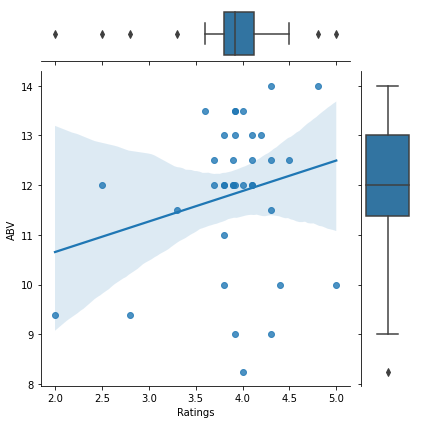

In [78]:
g = sns.JointGrid(data=dfw, x="Ratings", y="ABV")
g.plot(sns.regplot,sns.boxplot)

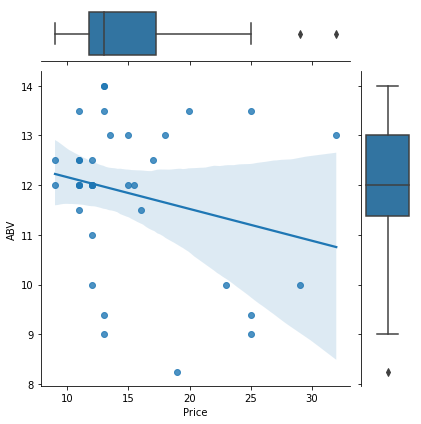

In [79]:
g = sns.JointGrid(data=dfw, x="Price", y="ABV")
g.plot(sns.regplot,sns.boxplot)

In [80]:
newdf = dfw.groupby(['Country'])["Ratings"].mean().reset_index(name='Average Ratings')
newdf=newdf.sort_values(by=['Average Ratings'])
newdf

,Country,Average Ratings
7,Romania,2.800000
2,France,3.645089
1,Chile,3.700000
3,Great Britain,3.957812
4,Italy,3.978906
0,Australia,4.100000
6,Portugal,4.100000
9,Spain,4.150000
8,South Africa,4.200000
5,New Zealand,4.371875


<AxesSubplot:xlabel='Country', ylabel='Average Ratings'>

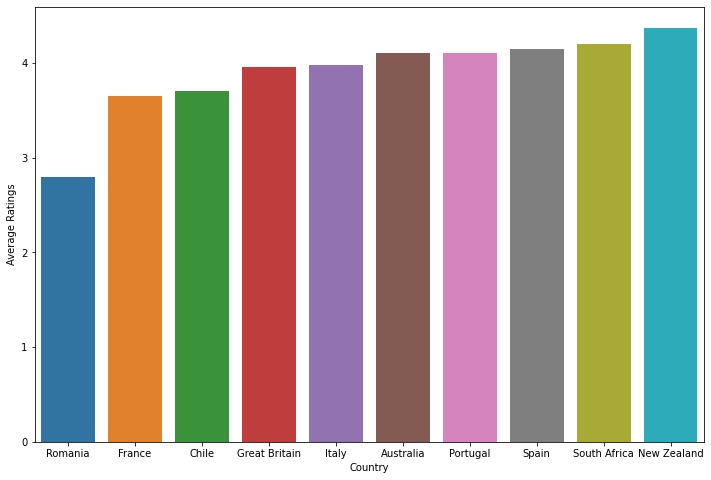

In [82]:
plt.figure(figsize=(12,8))
sns.barplot(data = newdf, x='Country', y='Average Ratings')

In [89]:
dfr['Type'] = 'Red'

C:\Users\karti\AppData\Local\Temp\ipykernel_19184\3292103099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Type'] = 'Red'


In [91]:
dfr.head(30)

,Names,Country,ABV,Ratings,Price,Type
0,Cabalié 2021,France,13.00,4.5,11.99,Red
1,Cabalié (1 Litre Wine Box) 2021,France,13.00,4.8,9.99,Red
2,Pillastro Primitivo 2020,Italy,10.00,4.4,11.99,Red
3,Cabalié Cuvée Vieilles Vignes 2021,France,13.00,4.5,14.99,Red
4,Rex Mundi Shiraz Grenache 2021,France,13.00,4.4,11.99,Red
5,Pillastro Primitivo 2021,Italy,10.00,4.4,11.99,Red
6,Clarendelle Bordeaux Inspired by Haut-Brion 2...,France,13.50,4.0,19.99,Red
7,The Dip 2021,Spain,14.50,4.2,10.99,Red
8,Ermita de San Lorenzo Gran Selección 2015,Spain,14.00,3.3,12.99,Red
9,Lobo e Falcão 2021,Portugal,13.50,4.4,11.99,Red


In [92]:
dfw['Type'] = 'White'

C:\Users\karti\AppData\Local\Temp\ipykernel_19184\1995480113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['Type'] = 'White'


In [93]:
dfw.head(30)

,Names,Country,ABV,Ratings,Price,Type
0,The Hour-Teller Sauvignon Blanc 2021,New Zealand,13.00,4.200000,14.99,White
1,The Escapist Sauvignon Blanc 2021,South Africa,12.50,3.900000,8.99,White
2,Albert Bichot Mâcon-Lugny Les Charmes 2020,France,13.00,3.800000,17.99,White
3,Clos des Lunes Lune d’Argent Bordeaux Blanc 2...,France,13.50,3.915625,19.99,White
4,L'Epiphanie de Bordeaux Blanc 2021,France,9.38,2.000000,25.00,White
5,Méritoire Sauvignon Blanc 2020,France,11.50,3.300000,10.99,White
6,Cloudy Bay Sauvignon Blanc 2022,New Zealand,13.50,3.915625,25.00,White
7,Sentiero dei Pini Pinot Grigio 2021,Italy,12.00,3.900000,10.99,White
8,Viña Tarapacá Riverscape Collection Sauvignon...,Chile,12.50,3.700000,10.99,White
9,Il Pino Pinot Grigio 2021,Italy,12.00,4.000000,11.99,White


## Concatenating 2 dataframes

In [97]:
frames = [dfr, dfw]
dfm = pd.concat(frames, ignore_index=True)

In [98]:
dfm.head(110)

,Names,Country,ABV,Ratings,Price,Type
0,Cabalié 2021,France,13.0,4.500000,11.99,Red
1,Cabalié (1 Litre Wine Box) 2021,France,13.0,4.800000,9.99,Red
2,Pillastro Primitivo 2020,Italy,10.0,4.400000,11.99,Red
3,Cabalié Cuvée Vieilles Vignes 2021,France,13.0,4.500000,14.99,Red
4,Rex Mundi Shiraz Grenache 2021,France,13.0,4.400000,11.99,Red
...,...,...,...,...,...,...
99,Domaine de Longuet Viognier 2020,France,13.5,3.600000,12.99,White
100,Balfour Springfield Chardonnay 2018,Great Britain,9.0,3.915625,25.00,White
101,Belle Vague Sauvignon Blanc 2020,France,12.0,2.500000,10.99,White
102,Dog Point Organic Chardonnay 2019,New Zealand,10.0,5.000000,29.00,White


In [144]:
newdf = dfm.groupby(['Country','Type'])["Ratings"].mean().reset_index(name='Average Ratings')
newdf=newdf.sort_values(by=['Average Ratings'])
newdf

,Country,Type,Average Ratings
14,Romania,White,2.800000
3,Bulgaria,Red,3.300000
15,South Africa,Red,3.513228
7,France,White,3.645089
5,Chile,White,3.700000
1,Australia,Red,3.733333
17,Spain,Red,3.750000
4,Chile,Red,3.800000
9,Italy,Red,3.956614
8,Great Britain,White,3.957812


<AxesSubplot:xlabel='Country', ylabel='Average Ratings'>

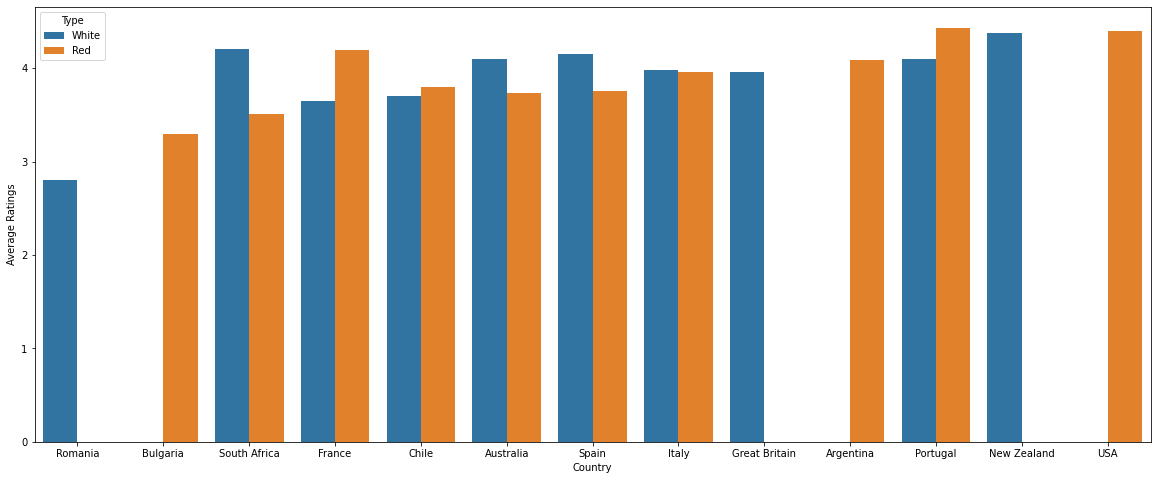

In [145]:
plt.figure(figsize=(20,8))
sns.barplot(data = newdf, x='Country', y='Average Ratings',hue='Type')